In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# device check and configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
# Hyper-parameters
num_epochs = 200
batch_size = 1000
learning_rate = 0.001

In [4]:
transform = transforms.Compose(
            [transforms.ToTensor(), 
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
            )


In [5]:
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)


Files already downloaded and verified


In [6]:
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified


In [7]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)



In [8]:
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True)


In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck')


In [10]:
def imshow(img):
    img /= 2
    img += 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

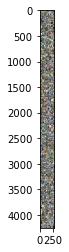

In [11]:
# show random training images

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))


In [12]:
# implement conv net
class MyNet(nn.Module):
    
    def __init__(self):
        
        super(MyNet, self).__init__()
        
        # input: 3 color, output: 6, kernel size: 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # 2 by 2 max pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # input: 6 by conv1 output, output: 16, kernel size: 5
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # input: 16(conv2output) * 1stkernelsize * 2ndkernelsize
        # output: 120
        self.fc1 = nn.Linear(16*5*5, 120)
        
        self.fc2 = nn.Linear(120, 84)
        
        # last output must be same as label(10 in this case)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*5*5)
        
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        
        x = self.fc3(x)
        
        return x



In [13]:
model = MyNet().to(device)


In [14]:
criterion = nn.CrossEntropyLoss()


In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [16]:
n_total_steps = len(train_loader)


In [17]:
print('memory:', torch.cuda.memory_allocated()/1024/1024)
print()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape : [4, 3, 32, 32] or 4, 3, 1024
        # input_layer : 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i-1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}, Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}]')
            print('memory:', torch.cuda.memory_allocated()/1024/1024)
        
print('###TRAINING FINISHED###')


memory: 0.23876953125

Epoch [1/200, Step [2/50], Loss: 2.3064]
memory: 12.5244140625
Epoch [2/200, Step [2/50], Loss: 2.3076]
memory: 12.5244140625
Epoch [3/200, Step [2/50], Loss: 2.3006]
memory: 12.5244140625
Epoch [4/200, Step [2/50], Loss: 2.3047]
memory: 12.5244140625
Epoch [5/200, Step [2/50], Loss: 2.3048]
memory: 12.5244140625
Epoch [6/200, Step [2/50], Loss: 2.3044]
memory: 12.5244140625
Epoch [7/200, Step [2/50], Loss: 2.3044]
memory: 12.5244140625
Epoch [8/200, Step [2/50], Loss: 2.3027]
memory: 12.5244140625
Epoch [9/200, Step [2/50], Loss: 2.3045]
memory: 12.5244140625
Epoch [10/200, Step [2/50], Loss: 2.3036]
memory: 12.5244140625
Epoch [11/200, Step [2/50], Loss: 2.3050]
memory: 12.5244140625
Epoch [12/200, Step [2/50], Loss: 2.3034]
memory: 12.5244140625
Epoch [13/200, Step [2/50], Loss: 2.3052]
memory: 12.5244140625
Epoch [14/200, Step [2/50], Loss: 2.3010]
memory: 12.5244140625
Epoch [15/200, Step [2/50], Loss: 2.3046]
memory: 12.5244140625
Epoch [16/200, Step [2/50]

Epoch [129/200, Step [2/50], Loss: 2.3011]
memory: 12.5244140625
Epoch [130/200, Step [2/50], Loss: 2.2984]
memory: 12.5244140625
Epoch [131/200, Step [2/50], Loss: 2.3002]
memory: 12.5244140625
Epoch [132/200, Step [2/50], Loss: 2.2999]
memory: 12.5244140625
Epoch [133/200, Step [2/50], Loss: 2.3000]
memory: 12.5244140625
Epoch [134/200, Step [2/50], Loss: 2.2970]
memory: 12.5244140625
Epoch [135/200, Step [2/50], Loss: 2.2973]
memory: 12.5244140625
Epoch [136/200, Step [2/50], Loss: 2.2994]
memory: 12.5244140625
Epoch [137/200, Step [2/50], Loss: 2.2995]
memory: 12.5244140625
Epoch [138/200, Step [2/50], Loss: 2.2990]
memory: 12.5244140625
Epoch [139/200, Step [2/50], Loss: 2.2981]
memory: 12.5244140625
Epoch [140/200, Step [2/50], Loss: 2.2979]
memory: 12.5244140625
Epoch [141/200, Step [2/50], Loss: 2.2990]
memory: 12.5244140625
Epoch [142/200, Step [2/50], Loss: 2.2989]
memory: 12.5244140625
Epoch [143/200, Step [2/50], Loss: 2.2983]
memory: 12.5244140625
Epoch [144/200, Step [2/5

In [18]:
# test model

print('memory:', torch.cuda.memory_allocated()/1024/1024)
print()
with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    n_class_correct = np.zeros(10)
    n_class_samples = np.zeros(10)
    
    for images, labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        
        for i in range(batch_size):
            
            label = labels[i]
            pred = predicted[i]
            
            if(label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
            
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc}%')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')



memory: 12.5244140625

Accuracy of the network: 18.44%
Accuracy of plane: 29.8 %
Accuracy of car: 63.0 %
Accuracy of bird: 0.0 %
Accuracy of cat: 0.2 %
Accuracy of deer: 3.1 %
Accuracy of dog: 13.4 %
Accuracy of frog: 3.3 %
Accuracy of horse: 65.1 %
Accuracy of ship: 0.0 %
Accuracy of truck: 6.5 %


In [19]:
print(torch.cuda.memory_allocated()/1024/1024)

12.5361328125
